# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 38

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
194,Casilla,Leeds United,41,2.978723,14,12.276242,4.7,4.121310,4.967755,NaN,2.035370
560,Kelleher,Liverpool,45,2.000000,10,8.428652,5.0,4.214326,NaN,NaN,1.986652
112,Arrizabalaga,Chelsea,47,7.027027,26,29.856784,3.7,4.248850,1.090098,NaN,1.959848
12,Martínez,Aston Villa,53,37.959184,186,164.339246,4.9,4.329367,3.621786,NaN,1.880557
523,Forster,Southampton,40,7.894737,30,29.585017,3.8,3.747436,5.054647,NaN,1.873718
548,Mendy,Chelsea,53,31.111111,140,128.494137,4.5,4.130169,5.235196,NaN,1.794031
213,Meslier,Leeds United,48,35.000000,154,137.045848,4.4,3.915596,3.242243,NaN,1.787217
417,Johnstone,West Brom,46,36.842105,140,139.783778,3.8,3.794131,3.869340,NaN,1.769023
597,Sánchez,Brighton,45,27.297297,101,101.486832,3.7,3.717834,2.799309,NaN,1.752604


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
75,Bernardo,Brighton,39,2.941176,5,11.762297,1.7,3.999181,NaN,NaN,2.025064
277,Cancelo,Manchester City,58,28.163265,138,137.087796,4.9,4.867610,2.228043,NaN,2.021165
273,Stones,Manchester City,51,22.068966,128,100.134703,5.8,4.537354,2.538258,NaN,2.009174
109,Rüdiger,Chelsea,47,18.979592,93,82.524485,4.9,4.348064,4.549677,NaN,2.005612
232,Chilwell,Chelsea,59,27.254902,139,128.413809,5.1,4.711586,5.445178,NaN,1.939729
39,Hause,Aston Villa,44,6.956522,32,28.116215,4.6,4.041706,2.154914,NaN,1.926808
13,Chambers,Arsenal,45,10.000000,36,40.680209,3.6,4.068021,3.681059,NaN,1.917683
104,Alonso,Chelsea,56,12.954545,57,58.129404,4.4,4.487182,3.390098,NaN,1.896181
123,James,Chelsea,51,32.000000,112,135.907119,3.5,4.247097,3.502461,NaN,1.880646


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,55,28.035714,157,140.894274,5.6,5.025528,3.395044,NaN,2.142892
301,Lingard,West Ham,66,16.060606,106,79.400829,6.6,4.943825,3.557627,NaN,1.924381
702,Elanga,Manchester Utd,45,2.000000,11,8.158771,5.5,4.079386,NaN,NaN,1.923041
272,De Bruyne,Manchester City,118,25.178571,141,160.932219,5.6,6.391634,8.843582,NaN,1.860677
570,Raphinha,Leeds United,56,30.227273,133,131.785169,4.4,4.359810,4.141953,NaN,1.842356
302,Fernandes,Manchester Utd,113,36.969697,244,227.171980,6.6,6.144816,4.704733,NaN,1.827972
105,Jorginho,Chelsea,47,27.804878,114,109.250972,4.1,3.929202,3.498595,NaN,1.812406
24,Saka,Arsenal,51,31.666667,114,128.325005,3.6,4.052369,2.390428,NaN,1.794419
695,Carvalho,Fulham,45,4.000000,12,14.691593,3.0,3.672898,NaN,NaN,1.731421


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
506,Wilson,Newcastle Utd,65,25.769231,134,122.506298,5.2,4.753976,7.200000,NaN,1.864663
202,Bamford,Leeds United,66,38.039216,194,182.021547,5.1,4.785103,4.953682,NaN,1.862599
388,Kane,Tottenham,119,35.072464,242,221.074696,6.9,6.303369,5.854210,NaN,1.827256
514,Watkins,Aston Villa,63,37.333333,168,167.579448,4.5,4.488735,5.194866,NaN,1.788355
437,Antonio,West Ham,67,26.222222,118,119.355249,4.5,4.551683,4.820000,NaN,1.758469
164,Calvert-Lewin,Everton,75,33.000000,165,155.226298,5.0,4.703827,4.766667,NaN,1.717595
224,Vardy,Leicester City,102,34.000000,187,184.974696,5.5,5.440432,4.958391,NaN,1.703465
699,Jebbison,Sheffield Utd,45,4.000000,12,14.400000,3.0,3.600000,NaN,NaN,1.697056
91,Wood,Burnley,66,32.857143,138,142.153149,4.2,4.326400,3.920000,NaN,1.684049


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
608,Carson,Manchester City,39,1.000000,7,8.750635,7.0,8.750635,NaN,4.431056
272,De Bruyne,Manchester City,118,25.178571,141,160.932219,5.6,6.391634,NaN,1.860677
388,Kane,Tottenham,119,35.072464,242,221.074696,6.9,6.303369,NaN,1.827256
302,Fernandes,Manchester Utd,113,36.969697,244,227.171980,6.6,6.144816,NaN,1.827972
254,Salah,Liverpool,129,37.258065,231,228.457156,6.2,6.131751,NaN,1.707221
224,Vardy,Leicester City,102,34.000000,187,184.974696,5.5,5.440432,NaN,1.703465
251,Mané,Liverpool,118,35.200000,176,188.267615,5.0,5.348512,NaN,1.557012
390,Son,Tottenham,96,36.774194,228,193.197344,6.2,5.253612,NaN,1.695596
276,Sterling,Manchester City,109,30.800000,154,158.339337,5.0,5.140888,NaN,1.557130


In [9]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
271,Gündogan,Manchester City,55,28.035714,5.6,5.025528,3.395044,NaN,NaN,2.142892
194,Casilla,Leeds United,41,2.978723,4.7,4.121310,4.967755,NaN,NaN,2.035370
75,Bernardo,Brighton,39,2.941176,1.7,3.999181,NaN,NaN,NaN,2.025064
277,Cancelo,Manchester City,58,28.163265,4.9,4.867610,2.228043,NaN,NaN,2.021165
273,Stones,Manchester City,51,22.068966,5.8,4.537354,2.538258,NaN,NaN,2.009174
109,Rüdiger,Chelsea,47,18.979592,4.9,4.348064,4.549677,NaN,NaN,2.005612
560,Kelleher,Liverpool,45,2.000000,5.0,4.214326,NaN,NaN,NaN,1.986652
112,Arrizabalaga,Chelsea,47,7.027027,3.7,4.248850,1.090098,NaN,NaN,1.959848
232,Chilwell,Chelsea,59,27.254902,5.1,4.711586,5.445178,NaN,NaN,1.939729


In [10]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,next5_xP,valuePoints metric
id,,,,,,,,,,,
254,Salah,Liverpool,129,37.258065,231,228.457156,6.2,6.131751,7.388823,NaN,1.707221
272,De Bruyne,Manchester City,118,25.178571,141,160.932219,5.6,6.391634,7.206951,NaN,1.860677
259,Alexander-Arnold,Liverpool,78,36.363636,160,175.425703,4.4,4.824207,6.846809,NaN,1.727343
388,Kane,Tottenham,119,35.072464,242,221.074696,6.9,6.303369,6.385672,NaN,1.827256
481,Pereira,West Brom,54,33.260870,153,132.277550,4.6,3.976972,6.381081,NaN,1.711416
232,Chilwell,Chelsea,59,27.254902,139,128.413809,5.1,4.711586,6.271638,NaN,1.939729
573,Olsen,Everton,45,6.944444,25,24.220094,3.6,3.487693,6.001046,NaN,1.644114
290,Mata,Manchester Utd,58,8.888889,32,29.661021,3.6,3.336865,5.875262,NaN,1.385558
251,Mané,Liverpool,118,35.200000,176,188.267615,5.0,5.348512,5.829796,NaN,1.557012


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
1,Özil,Arsenal,67,NaN,0,NaN,0.0,NaN,NaN,NaN
2,Sokratis,Arsenal,48,NaN,0,NaN,0.0,NaN,NaN,NaN
3,David Luiz,Arsenal,54,20.500000,41,55.157473,2.0,2.690608,NaN,1.157854
4,Aubameyang,Arsenal,113,29.111111,131,133.826399,4.5,4.597090,NaN,1.367552
5,Cédric,Arsenal,46,10.000000,28,34.138110,2.8,3.413811,NaN,1.591698
6,Lacazette,Arsenal,84,30.714286,129,115.773149,4.2,3.769358,NaN,1.300552
7,Mustafi,Arsenal,50,3.000000,3,6.740118,1.0,2.246706,NaN,1.004757
8,Leno,Arsenal,50,35.405405,131,131.140132,3.7,3.703958,NaN,1.656460
9,Xhaka,Arsenal,52,30.434783,70,68.827906,2.3,2.261488,NaN,0.991728


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
254,Salah,Liverpool,129,37.258065,6.2,6.131751,NaN,1.707221,20.9,6.3,27.2,0.730043
388,Kane,Tottenham,119,35.072464,6.9,6.303369,NaN,1.827256,20.5,7.4,27.9,0.795496
224,Vardy,Leicester City,102,34.000000,5.5,5.440432,NaN,1.703465,19.7,4.9,24.6,0.723529
202,Bamford,Leeds United,66,38.039216,5.1,4.785103,NaN,1.862599,17.3,4.1,21.4,0.562577
514,Watkins,Aston Villa,63,37.333333,4.5,4.488735,NaN,1.788355,16.0,4.2,20.2,0.541071
164,Calvert-Lewin,Everton,75,33.000000,5.0,4.703827,NaN,1.717595,15.4,2.0,17.4,0.527273
302,Fernandes,Manchester Utd,113,36.969697,6.6,6.144816,NaN,1.827972,15.4,11.0,26.4,0.714098
251,Mané,Liverpool,118,35.200000,5.0,5.348512,NaN,1.557012,15.2,5.7,20.9,0.593750
91,Wood,Burnley,66,32.857143,4.2,4.326400,NaN,1.684049,13.3,2.2,15.5,0.471739


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week25,assists_week26,assists_week27,assists_week28,assists_week29,assists_week3,assists_week30,assists_week31,assists_week32,assists_week33,assists_week34,assists_week35,assists_week36,assists_week37,assists_week38,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,...,xG_week35,xG_week36,xG_week37,xG_week38,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 25,xPoints week 26,xPoints week 27,xPoints week 28,xPoints week 29,xPoints week 3,xPoints week 30,xPoints week 31,xPoints week 32,xPoints week 33,xPoints week 34,xPoints week 35,xPoints week 36,xPoints week 37,xPoints week 38,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
468,80.601779,4.217535,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,228,100.0,50.0,5.801779,4,NaN,0.0,0.0,...,0.5,NaN,NaN,0.0,0.2,0.1,0.2,0.6,0.4,0.5,1.0,NaN,5.122456,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.072532,3.949329,NaN,2.5,4.5,4.667879,5.949569,3.8,NaN,6.772532,NaN,NaN,1.0,3.020242,1.5,5.22313,6.6,4.201897,8.772532,2


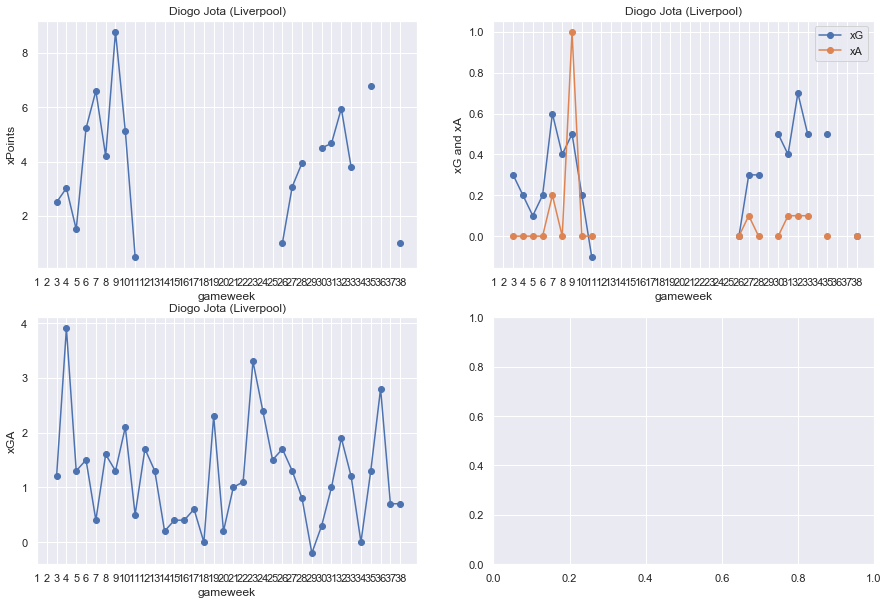

In [14]:
# find player index
name_string = 'Jota'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
#ix = playersFound.index[0]
ix = 468

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df.loc[df['web_name'].str.contains('Raphinha'),'web_name']

id
570    Raphinha
Name: web_name, dtype: object

In [16]:
my_starting11 = [12,558,16,259,570,302,254,301,388,202,166] #vardy=224, grealish=37, mane=251
my_subs = [597,23,156,74]

In [17]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11,'next1_xP'].sum() + df.loc[my_starting11,'next1_xP'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Expected points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 59.45497337264986
Expected points next gameweek: nan


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,53,37.959184,4.9,4.329367,3.621786,3.376962,NaN,NaN,1.880557
558,Coufal,West Ham,48,33.684211,3.8,3.881285,4.625509,3.786656,NaN,NaN,1.771556
16,Holding,Arsenal,43,30.000000,3.5,3.445741,3.610572,3.748797,NaN,NaN,1.661684
259,Alexander-Arnold,Liverpool,78,36.363636,4.4,4.824207,6.092858,6.846809,NaN,NaN,1.727343
570,Raphinha,Leeds United,56,30.227273,4.4,4.359810,4.141953,4.755276,NaN,NaN,1.842356
302,Fernandes,Manchester Utd,113,36.969697,6.6,6.144816,4.704733,4.647106,NaN,NaN,1.827972
254,Salah,Liverpool,129,37.258065,6.2,6.131751,7.797904,7.388823,NaN,NaN,1.707221
301,Lingard,West Ham,66,16.060606,6.6,4.943825,3.557627,4.892949,NaN,NaN,1.924381
388,Kane,Tottenham,119,35.072464,6.9,6.303369,5.854210,6.385672,NaN,NaN,1.827256



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,45,27.297297,3.7,3.717834,2.799309,3.719635,NaN,NaN,1.752604
23,Smith Rowe,Arsenal,42,20.000000,3.7,3.454439,4.302643,3.538067,NaN,NaN,1.685594
156,Keane,Everton,50,35.277778,3.6,3.116668,2.819583,2.788098,NaN,NaN,1.393816
74,White,Brighton,45,35.862069,2.9,3.220393,3.039309,3.422115,NaN,NaN,1.518108


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)